In [1]:
import matplotlib.pyplot as plt
import collections
import quantities as pq
import izhikevich as izhi
import numpy as np
%matplotlib inline
from utils import reduced_cells, transform_input

DELAY = 0*pq.ms
DURATION = 250 *pq.ms

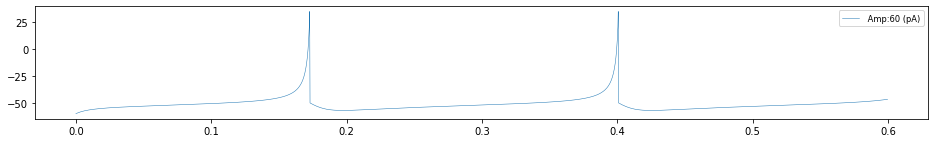

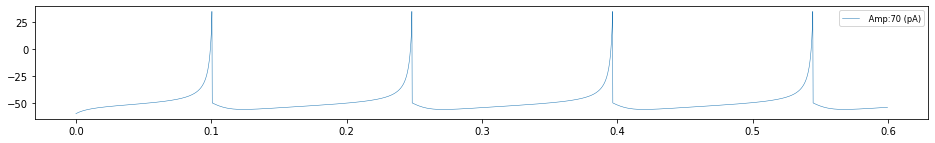

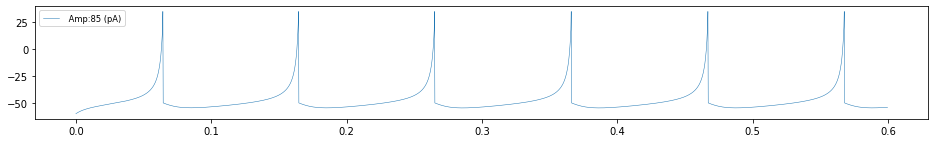

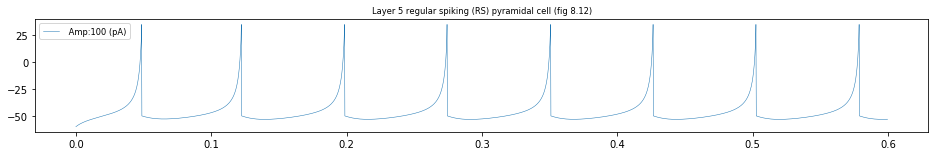

In [2]:
IinRange = [60,70,85,100];

params = {}
params['amplitude'] = 500*pq.pA
params['delay'] = DELAY
params['duration'] = 600*pq.ms


for i,amp in enumerate(IinRange):
    model = izhi.IZHIModel()
    model.set_attrs(reduced_cells['RS'])
    params['amplitude'] = amp
    model.inject_square_current(params)
    vm = model.get_membrane_potential()
    plt.figure(figsize=(16,12))

    plt.subplot(5,1,i+1)

    plt.plot(vm.times,vm.magnitude,label=str(' Amp:')+str(amp)+str(' (pA)'))
    plt.legend()
plt.title('Layer 5 regular spiking (RS) pyramidal cell (fig 8.12)')
plt.show()


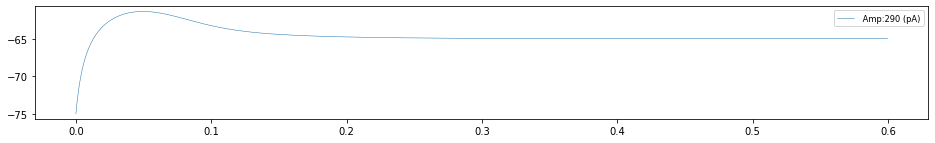

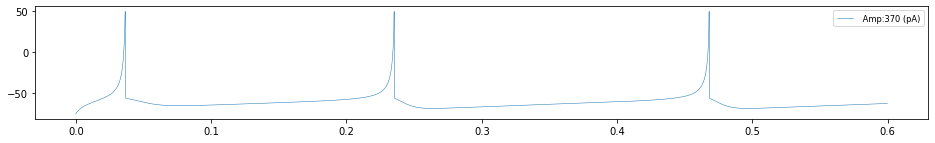

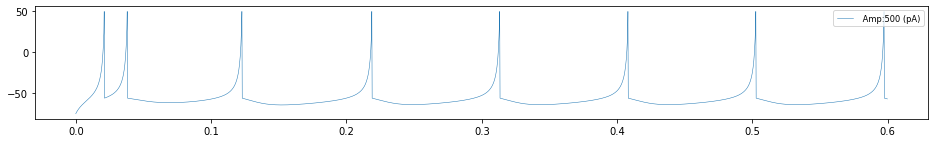

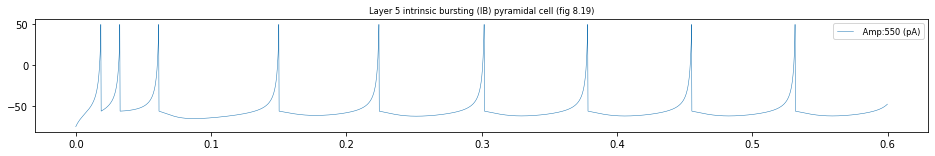

In [3]:
IinRange = [290,370,500,550];

params = {}
#params['amplitude'] = 500*pq.pA
params['delay'] = DELAY
params['duration'] = 600*pq.ms


for i,amp in enumerate(IinRange):

    model = izhi.IZHIModel()
    model.set_attrs(reduced_cells['IB'])
    params['amplitude'] = amp
    
    model.inject_square_current(params)
    vm = model.get_membrane_potential()
    plt.figure(figsize=(16,12))

    plt.subplot(5,1,i+1)

    plt.plot(vm.times,vm.magnitude,label=str(' Amp:')+str(amp)+str(' (pA)'))
    plt.legend()
plt.title('Layer 5 intrinsic bursting (IB) pyramidal cell (fig 8.19)')
plt.show()

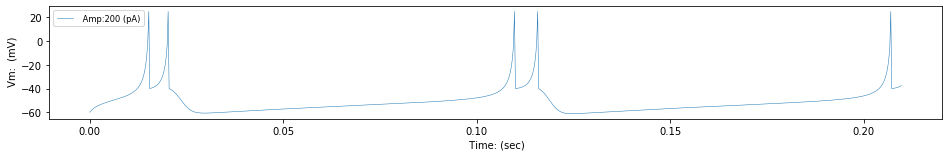

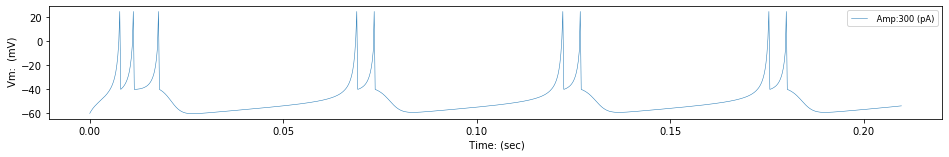

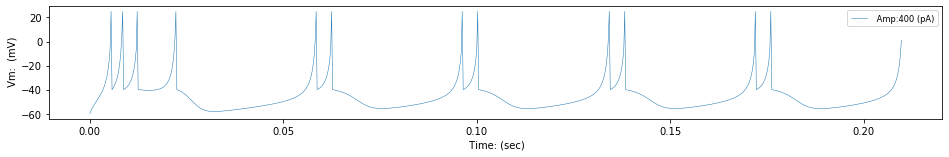

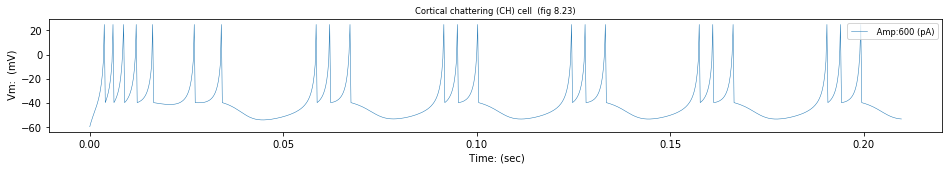

In [4]:
IinRange = [200,300,400,600];

params = {}
params['delay'] = DELAY
params['duration'] = 210*pq.ms


for i,amp in enumerate(IinRange):

    model = izhi.IZHIModel()
    model.set_attrs(reduced_cells['CH'])
    params['amplitude'] = amp
    
    model.inject_square_current(params)
    vm = model.get_membrane_potential()
    plt.figure(figsize=(16,12))

    plt.subplot(5,1,i+1)

    plt.plot(vm.times,vm.magnitude,label=str(' Amp:')+str(amp)+str(' (pA)'))
    plt.xlabel(str(' Time:' )+str(' (sec)'))
    plt.ylabel(str(' Vm: ')+str(' (mV)'))

    plt.legend()
plt.title('Cortical chattering (CH) cell  (fig 8.23)')
#T=210;
#figtitle = 'Cortical chattering (CH) cell  (fig 8.23)';

plt.show()

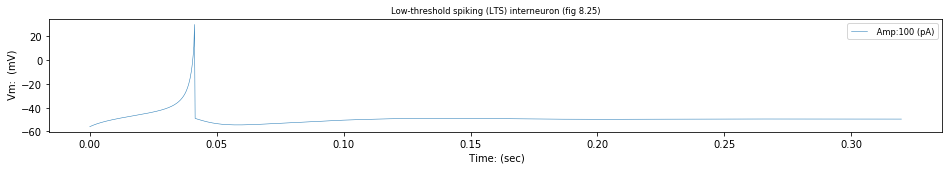

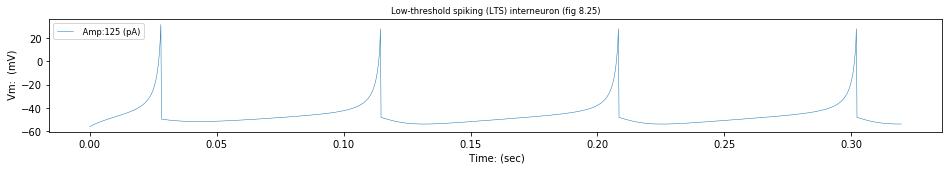

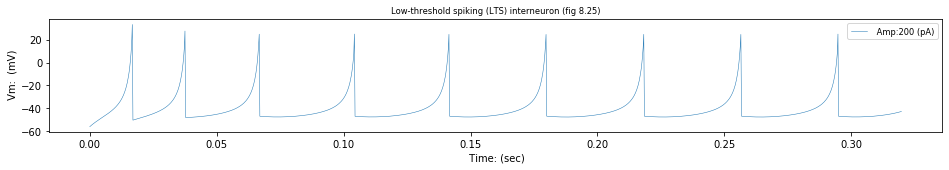

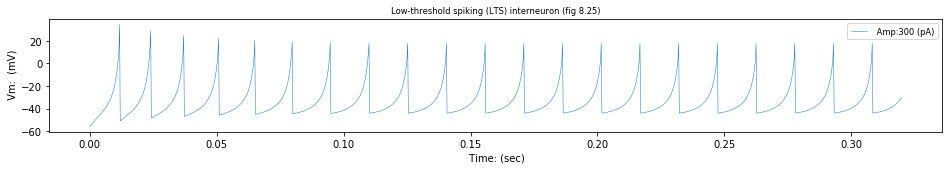

In [5]:
IinRange = [100,125,200,300];

params = {}
params['delay'] = DELAY


T=320;
figtitle = 'Low-threshold spiking (LTS) interneuron (fig 8.25)';
params['duration'] = T*pq.ms


for i,amp in enumerate(IinRange):

    model = izhi.IZHIModel()
    model.set_attrs(reduced_cells['LTS'])
    params['amplitude'] = amp

    model.inject_square_current(params)
    vm = model.get_membrane_potential()
    plt.figure(figsize=(16,12))

    plt.subplot(5,1,i+1)

    plt.plot(vm.times,vm.magnitude,label=str(' Amp:')+str(amp)+str(' (pA)'))
    plt.xlabel(str(' Time:' )+str(' (sec)'))
    plt.ylabel(str(' Vm: ')+str(' (mV)'))

    plt.legend()
    plt.title(figtitle)

plt.show()

<Figure size 720x720 with 0 Axes>

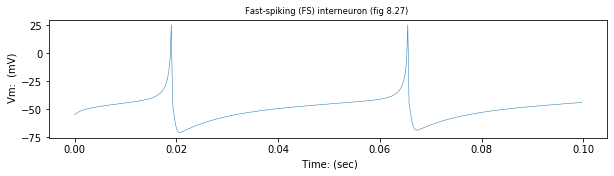

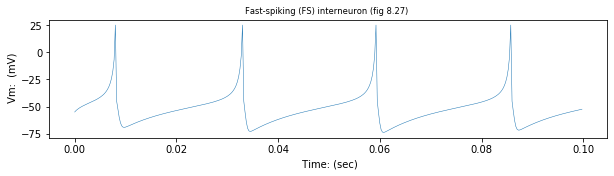

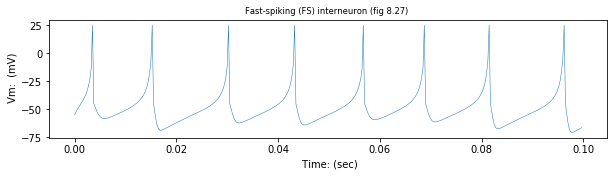

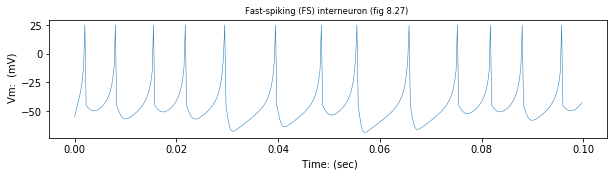

In [6]:
T=100;
IinRange = [73.2,100,200,400];

figtitle = 'Fast-spiking (FS) interneuron (fig 8.27) ';
plt.figure(figsize=(10,10))

for i,amp in enumerate(IinRange):
    model = izhi.IZHIModel()
    
    plt.figure(figsize=(10,10))

    model.set_attrs(reduced_cells['FS'])
    params['amplitude'] = amp
    params['duration'] = T
    #print(model.attrs)
    #print("C=20; k=1; vr=-55; vt=-40; vpeak=25; a=0.2; b=-2; c=-45; d=-55; celltype=5;")
    model.inject_square_current(params)
    vm = model.get_membrane_potential()

    plt.subplot(4,1,i+1)
    #plt.clf()
    plt.plot(vm.times,vm.magnitude,label=str(' Amp:')+str(amp)+str(' (pA)'))
    plt.xlabel(str(' Time:' )+str(' (sec)'))
    plt.ylabel(str(' Vm: ')+str(' (mV)'))
    #plt.show()
    #plt.legend()
    plt.title(figtitle)
    plt.show()


# Bursting

In [7]:



Iin0 = -1200; #% required to lower Vrmp to -80mV for 120 ms
IinRange = [0,50,100];
T=650;
IinRange = transform_input(T,IinRange,Iin0,burstMode=True)


(3, 3080)

/home/user/anaconda3/lib/python3.7/site-packages/numba/ir_utils.py:1959: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'I' of function 'get_vm_six'.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "izhikevich.py", line 102:
@jit#(nopython=True)
def get_vm_six(C=89.7960714285714,
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


<Figure size 720x720 with 0 Axes>

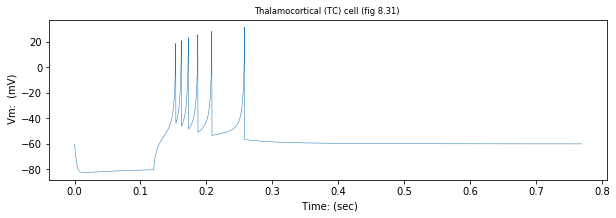

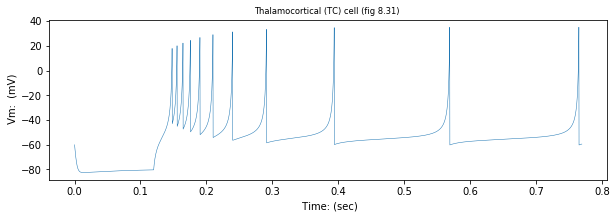

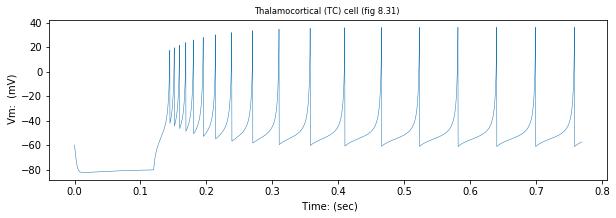

In [8]:


#T=650;
figtitle = 'Thalamocortical (TC) cell (fig 8.31) ';
Iin0 = -1200; #% required to lower Vrmp to -80mV for 120 ms
#reduced_cells['TC']['celltype'] = 6
#fig = 
plt.figure(figsize=(10,10))

for i,amp in enumerate(IinRange):
    model = izhi.IZHIModel()
    
    #reduced_cells['TC']['a'] = 0.01
    #print(amp)
    #break
    plt.figure(figsize=(10,10))

    model.set_attrs(reduced_cells['TC'])
    vm = model.inject_direct_current(amp)
    #vm = model.get_membrane_potential()
    #break
    plt.subplot(3,1,i+1)
    #plt.clf()
    plt.plot(vm.times,vm.magnitude,label=str(' Amp:')+str(amp)+str(' (pA)'))
    plt.xlabel(str(' Time:' )+str(' (sec)'))
    plt.ylabel(str(' Vm: ')+str(' (mV)'))
    #plt.show()
    #plt.legend()
    plt.title(figtitle)
    plt.show()


/home/user/anaconda3/lib/python3.7/site-packages/numba/ir_utils.py:1959: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'I' of function 'get_vm_seven'.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "izhikevich.py", line 147:
@jit#(nopython=True)
def get_vm_seven(C=89.7960714285714,
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


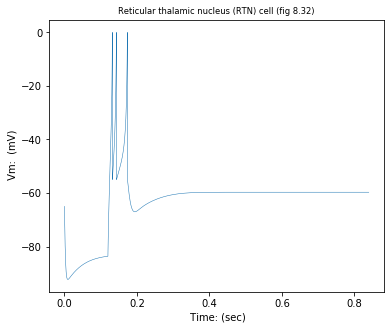

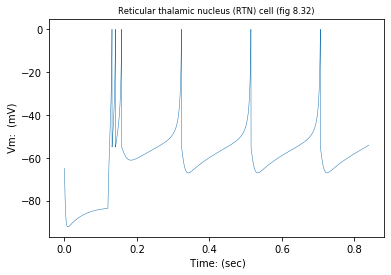

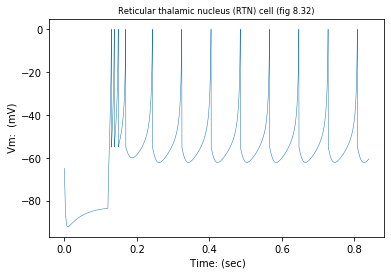

In [10]:

plt.figure(figsize=(6,5))
import numpy as np
#Iin0 = -1200; #% required to lower Vrmp to -80mV for 120 ms
#IinRange = [0,50,100];
#T=650;

Iin0 = -350;
IinRange = [30,50,90];
T=720;

IinRange = transform_input(T,IinRange,Iin0,burstMode=True)
np.shape(IinRange)


T=650;
figtitle = 'Reticular thalamic nucleus (RTN) cell (fig 8.32)';
Iin0 = -1200; #% required to lower Vrmp to -80mV for 120 ms
#reduced_cells['TC']['celltype'] = 6
for i,amp in enumerate(IinRange):
    model = izhi.IZHIModel()
    model.set_attrs(reduced_cells['RTN'])
    vm = model.inject_direct_current(amp)
    #vm = model.get_membrane_potential()

    plt.subplot(3,1,i+1)
    plt.clf()
    plt.plot(vm.times,vm.magnitude,label=str(' Amp:')+str(amp)+str(' (pA)'))
    plt.xlabel(str(' Time:' )+str(' (sec)'))
    plt.ylabel(str(' Vm: ')+str(' (mV)'))
    #plt.legend()
    plt.title(figtitle)
    plt.show()
    
